In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Using OpenCV

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from extract_center import CenterExtracter

In [3]:
plt.rcdefaults()

In [4]:
c = CenterExtracter()

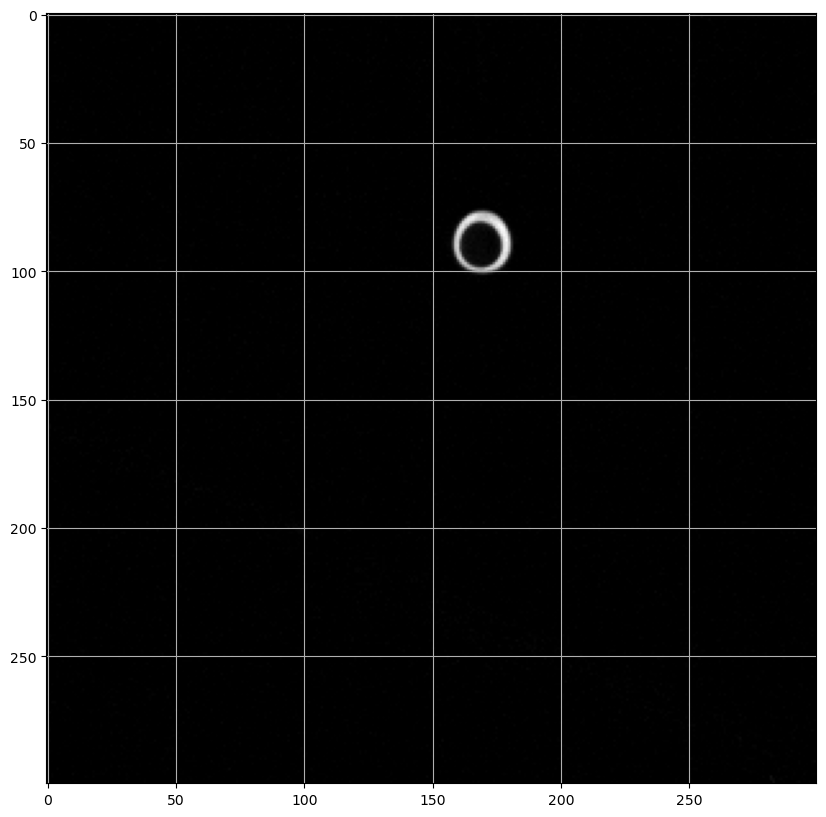

In [5]:
img = c._read_image_("../data/images1/34.jpg")
img = c._subtract_image_(img)
img = c._crop_(img, 0, 0, 300, 300)
c._show_image_(img)

In [6]:
images = os.listdir(r"C:\Users\harik\Desktop\mini-project\data\images1")

In [12]:
type(img)

numpy.ndarray

In [7]:
rows = img.shape[0]
circles = cv.HoughCircles(img, cv.HOUGH_GRADIENT, 1,rows / 8,
                                param1=100, param2=30,
                                minRadius=1, maxRadius=30)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\hough.cpp:2257: error: (-215:Assertion failed) !_image.empty() && _image.type() == CV_8UC1 && (_image.isMat() || _image.isUMat()) in function 'cv::HoughCircles'


In [20]:
images = [i for i in images if i.endswith(".jpg")]

In [21]:
def center_using_opencv(image):
    src = cv.imread(image, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_circle.py [image_name -- default ' + image + '] \n')


    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)


    gray = cv.medianBlur(gray, 5)


    rows = gray.shape[0]
    circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, rows / 8,
                                param1=100, param2=30,
                                minRadius=1, maxRadius=30)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv.circle(src, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv.circle(src, center, radius, (255, 0, 255), 3)
        return center, radius
    else:
        return (None, None), None

In [32]:
center_using_opencv("../data/images1/10.jpg")

((870, 406), 9)

In [9]:
import random

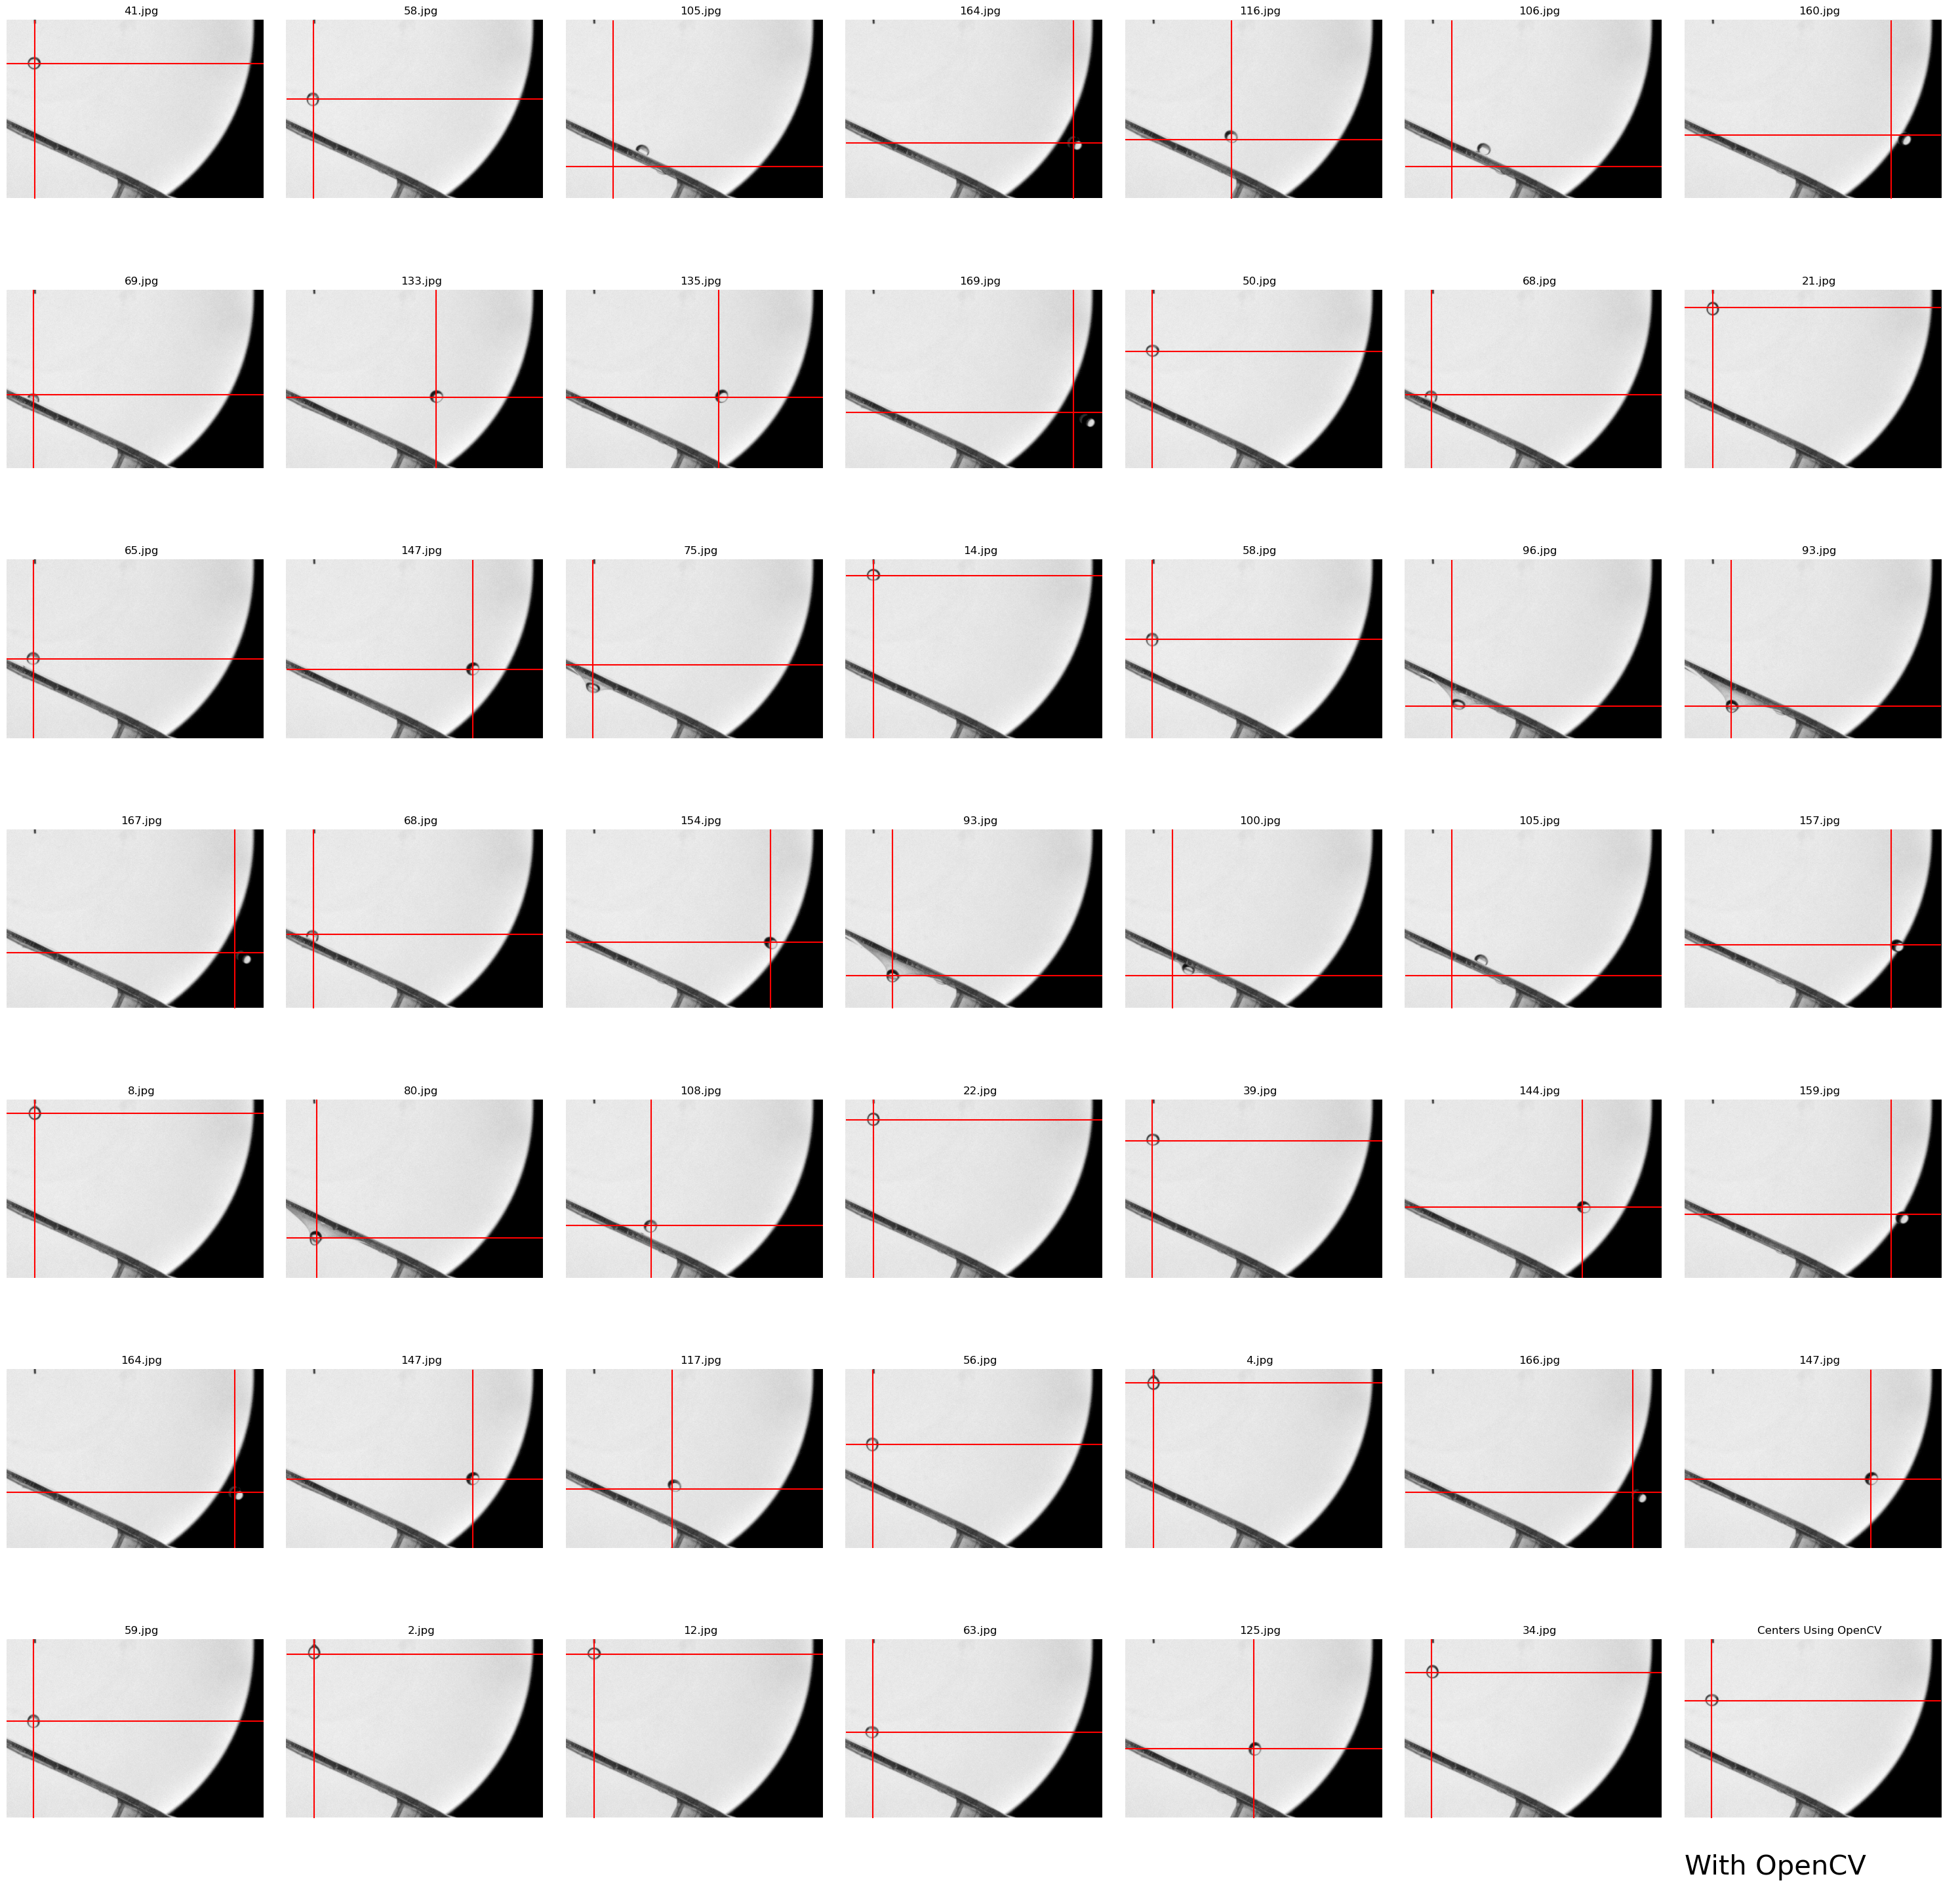

In [16]:
plt.figure(figsize=(30, 30), )
all_imgs = list(range(len(images)))
for i in range(49):
    j = random.choice(all_imgs)
    directory = r"C:\Users\harik\Desktop\mini-project\data\Images"
    directory = f"{directory}\{j}.jpg"
    img = plt.imread(directory)
    img = img[380:700, 820:1300]
    c = centers[j]
    plt.subplot(7, 7, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(directory.split("\\")[-1])
    plt.hlines(c[1]-380, 0, img.shape[1], color='r')
    plt.vlines(c[0]-820, 0, img.shape[0], color='r')
    plt.axis('off')
    # plt.scatter(c[0], c[1], color='red')
plt.title("Centers Using OpenCV")
plt.annotate("With OpenCV", (0, 0), (0, -30), xycoords='axes fraction', textcoords='offset points', va='top', fontsize=30)
plt.tight_layout()
plt.savefig("sample_with_opencv.jpg")